In [9]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_data = pd.read_csv(r"D:\Projects\Digit-Recognizer\train.csv")# your path here

X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

X_train = X_train / 255.0

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred = svm_model.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)
print(f'SVM Validation accuracy: {val_accuracy:.5f}')


RMSE: 0.12946


,Id,SalePrice
0,1461,124861.977220
1,1462,154849.737021
2,1463,185281.015421
3,1464,190606.089063
4,1465,192238.397266
5,1466,175354.311113
6,1467,175664.254857
7,1468,165939.268289
8,1469,189590.617450
9,1470,125444.763262


In [9]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv(r"D:\Projects\Digit-Recognizer\train.csv")# your path here
test_data = pd.read_csv(r"D:\Projects\Digit-Recognizer\test.csv")# your path here

x_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
x_test = test_data.values

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = utils.to_categorical(y_train)

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=random_seed)

print("Размер обучающей выборки:", X_train.shape, Y_train.shape)
print("Размер валидационной выборки:", X_val.shape, Y_val.shape)

Размер обучающей выборки: (37800, 28, 28, 1) (37800, 10)
Размер валидационной выборки: (4200, 28, 28, 1) (4200, 10)


28

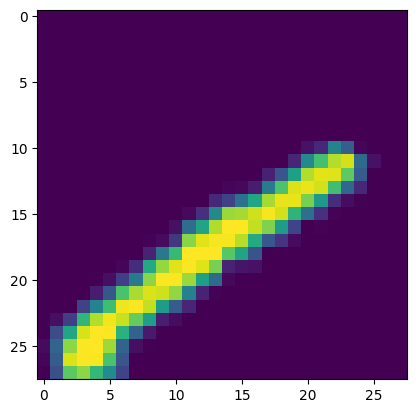

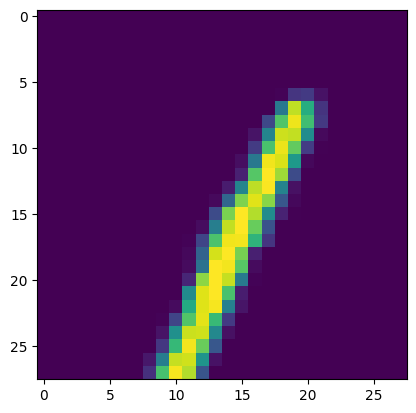

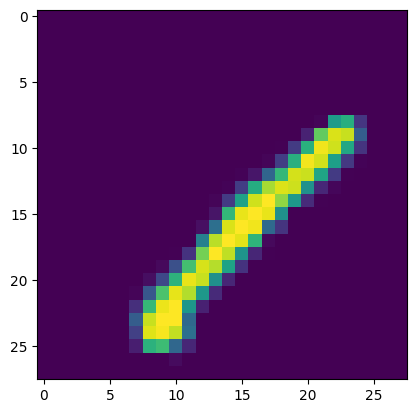

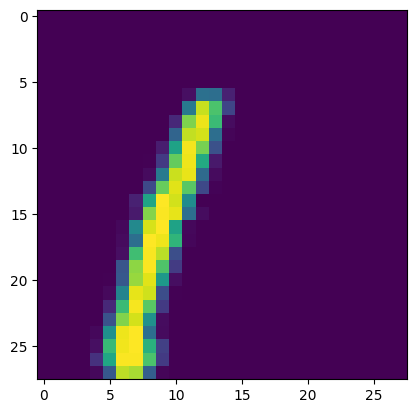

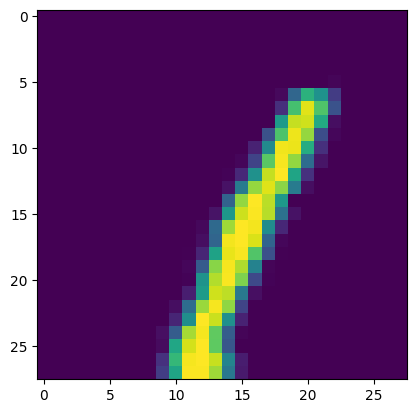

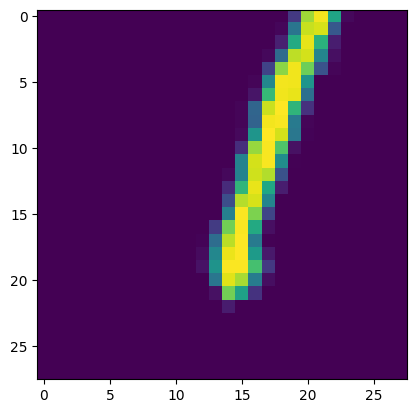

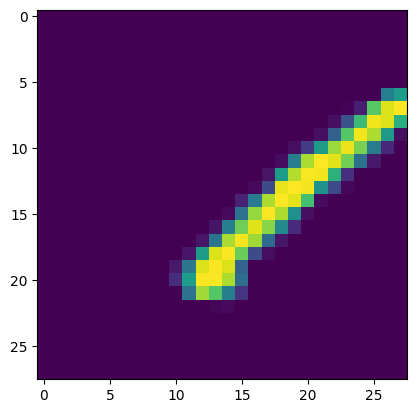

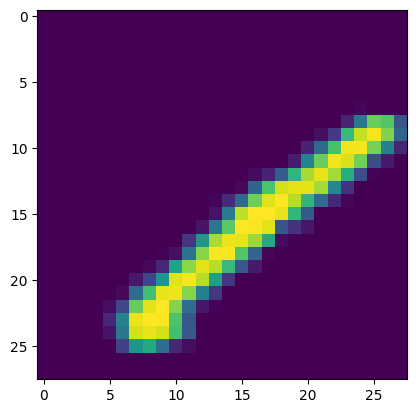

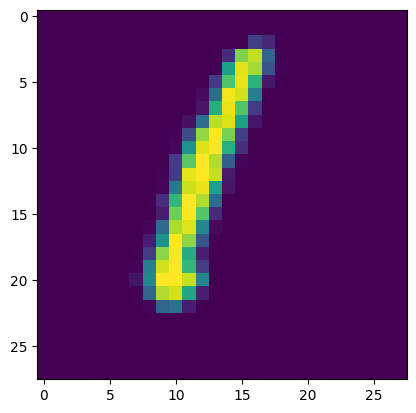

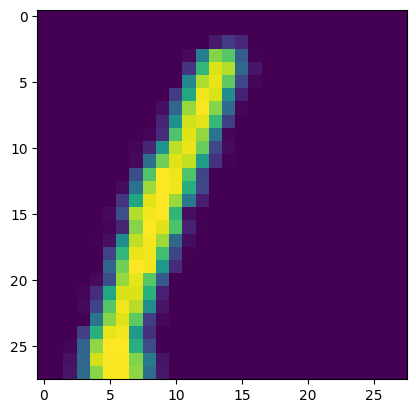

In [3]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=20,
        zoom_range = 0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=False,
        vertical_flip=False
)
i = 0
data = x_train[0]
data = np.expand_dims(data, axis=0)

for batch in datagen.flow(data, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(batch[0][:,:,0])

  i += 1
  if i % 10 == 0:
    break

plt.show()

Epoch 1/10


d:\Anaconda\envs\my-course\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


591/591 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8392 - loss: 0.5148 - val_accuracy: 0.9764 - val_loss: 0.0761
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9765 - loss: 0.0770 - val_accuracy: 0.9829 - val_loss: 0.0537
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9846 - loss: 0.0491 - val_accuracy: 0.9867 - val_loss: 0.0407
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9880 - loss: 0.0384 - val_accuracy: 0.9879 - val_loss: 0.0373
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9901 - loss: 0.0291 - val_accuracy: 0.9862 - val_loss: 0.0453
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9914 - loss: 0.0264 - val_accuracy: 0.9874 - val_loss: 0.0366
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9926 - loss: 0.0220 - val_accuracy: 0.9898 - val_loss: 0.0333
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.989

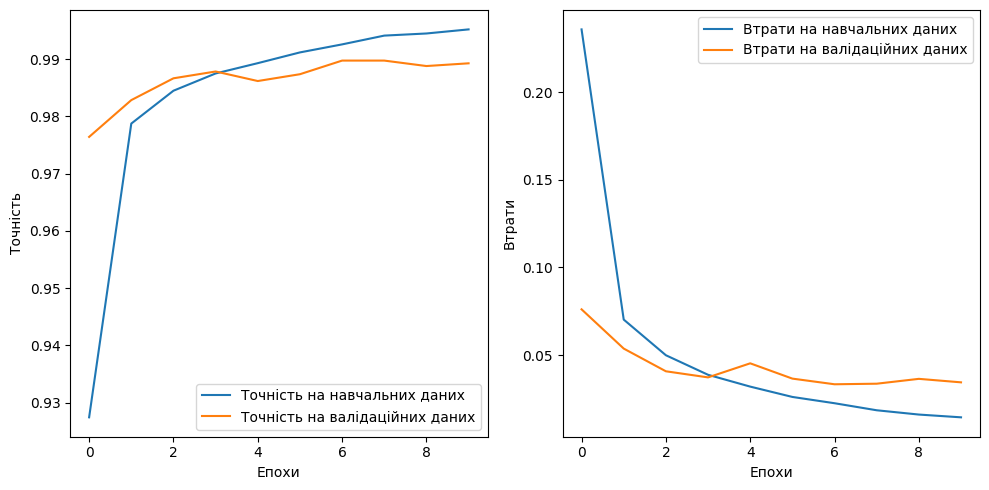

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.0300


[0.03442686051130295, 0.9892857074737549]

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

train_data = pd.read_csv(r"D:\Projects\Digit-Recognizer\train.csv")  
test_data = pd.read_csv(r"D:\Projects\Digit-Recognizer\test.csv")   

x_train = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(train_data['label'].values)

random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=random_seed)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_val, Y_val))

test_images = test_data.values.reshape(-1, 28, 28, 1) / 255.0
predictions = model.predict(test_images)
model.evaluate(X_val, Y_val)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на навчальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на навчальних даних')
plt.plot(history.history['val_loss'], label='Втрати на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.show()
